In [12]:
import pandas as pd
import numpy as np 

import boto3
import sagemaker.amazon.common as smac

In [13]:
# Download Data from S3 -- Simplest method

s3 = boto3.resource('s3')
bucket = s3.Bucket('sagemakerpractise') #Bucket
obj = bucket.Object('Decision_Tree/Social_Network_Ads.csv') #File in the bucket or File path 

with open('SocialNetwork', 'wb') as data:
    obj.download_fileobj(data)

In [14]:
SocialNetwork = pd.read_csv('SocialNetwork')

In [15]:
SocialNetwork = pd.DataFrame(SocialNetwork)

In [16]:
SocialNetwork.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [17]:
X = SocialNetwork.iloc[:, [2, 3]] # We only need the Age and Estimated Salary columns as the independent variables
Y = SocialNetwork.iloc[:, 4] # Purchased is the dependent variable

In [18]:
# Split the data set into training set and test set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [20]:
# Feature scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [23]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [13]:
# Fitting Classifier to training set

In [24]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [25]:
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [26]:
# Fitting the Test set results

In [27]:
Y_pred = classifier.predict(X_test)

In [28]:
# Making confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [30]:
cm

array([[61,  7],
       [ 3, 29]])

In [31]:
# Visualising the training set results

Text(0,0.5,'Estimated Salary')

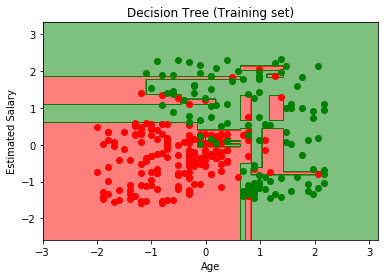

In [33]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
# This creates the canvas with enough space in both x axis and y axis, so the points plotted do look squeezed. 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), 
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# Creates the contour of 2 areas separated linearly to classify the training set results
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
                                        alpha = 0.5, cmap = ListedColormap(('red', 'green')))
# Sets the min and max limits for the graph
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# enumarates over each row to plot the point on the graph
for i, j in enumerate (np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

    
# Diplays the titles and the lables 
plt.title('Decision Tree (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

In [34]:
# Visualising the Test set Results

Text(0,0.5,'Estimated Salary')

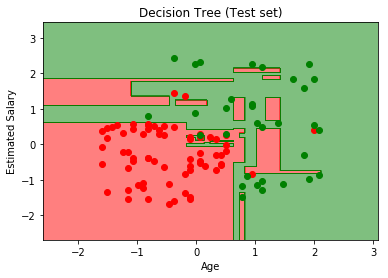

In [35]:
X_set, Y_set = X_test, Y_test
# This creates the canvas with enough space in both x axis and y axis, so the points plotted do look squeezed. 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), 
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# Creates the contour of 2 areas separated linearly to classify the training set results
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
                                        alpha = 0.5, cmap = ListedColormap(('red', 'green')))
# Sets the min and max limits for the graph
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# enumarates over each row to plot the point on the graph
for i, j in enumerate (np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

    
# Diplays the titles and the lables 
plt.title('Decision Tree (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')